In [103]:
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint



In [104]:
dataset_path = 'dataset'

train_data = tf.keras.utils.audio_dataset_from_directory(
    dataset_path,
    batch_size = 8,
    shuffle = True,
    validation_split = 0.2,
    subset = "training",
    output_sequence_length = 48000,
    ragged = False,
    label_mode = "categorical",
    labels = "inferred",
    sampling_rate = None,
    seed = 59
)

Found 1376 files belonging to 17 classes.
Using 1101 files for training.


In [105]:
validation_data = tf.keras.utils.audio_dataset_from_directory(
    dataset_path,
    batch_size = 8,
    shuffle = True,
    validation_split = 0.2,
    subset = "validation",
    output_sequence_length = 48000,
    ragged = False,
    label_mode = "categorical",
    labels = "inferred",
    sampling_rate = None,
    seed = 59
)

Found 1376 files belonging to 17 classes.
Using 275 files for validation.


In [106]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv1D(16, kernel_size = 80,strides = 16, activation = "relu", input_shape = (48000, 1)),
    tf.keras.layers.MaxPooling1D(4),

    tf.keras.layers.Conv1D(16, kernel_size = 3, activation = "relu"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling1D(4),

    tf.keras.layers.Conv1D(16, kernel_size = 3,activation = "relu"),
    tf.keras.layers.MaxPooling1D(4),

    tf.keras.layers.Conv1D(32, kernel_size = 3,activation = "relu"),
    tf.keras.layers.MaxPooling1D(4),

    tf.keras.layers.Conv1D(32, kernel_size = 3,activation = "relu"),
    tf.keras.layers.MaxPooling1D(4),



    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(17, activation = "softmax")

])

In [107]:
model.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_101 (Conv1D)         (None, 2996, 16)          1296      
                                                                 
 max_pooling1d_101 (MaxPool  (None, 749, 16)           0         
 ing1D)                                                          
                                                                 
 conv1d_102 (Conv1D)         (None, 747, 16)           784       
                                                                 
 batch_normalization_15 (Ba  (None, 747, 16)           64        
 tchNormalization)                                               
                                                                 
 max_pooling1d_102 (MaxPool  (None, 186, 16)           0         
 ing1D)                                                          
                                                     

In [108]:
model.compile(tf.keras.optimizers.Adam(learning_rate= 0.0001),
              loss = "categorical_crossentropy",
              metrics = ["accuracy"]
              )

In [109]:
checkpoint_filepath = 'model/weights.h5'


model_checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_filepath,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

In [110]:
output = model.fit(train_data,
          validation_data = validation_data,
          epochs = 100,
          callbacks=[model_checkpoint_callback])

Epoch 1/100
138/138 [==============================] - 5s 21ms/step - loss: 2.8594 - accuracy: 0.0790 - val_loss: 2.8238 - val_accuracy: 0.0473
Epoch 2/100
138/138 [==============================] - 3s 21ms/step - loss: 2.7284 - accuracy: 0.0881 - val_loss: 2.8006 - val_accuracy: 0.0836
Epoch 3/100
138/138 [==============================] - 51s 371ms/step - loss: 2.6599 - accuracy: 0.0999 - val_loss: 2.7500 - val_accuracy: 0.1091
Epoch 4/100
138/138 [==============================] - 5s 34ms/step - loss: 2.5816 - accuracy: 0.1317 - val_loss: 2.6438 - val_accuracy: 0.1564
Epoch 5/100
138/138 [==============================] - 3s 21ms/step - loss: 2.4708 - accuracy: 0.1780 - val_loss: 2.4794 - val_accuracy: 0.1855
Epoch 6/100
138/138 [==============================] - 3s 19ms/step - loss: 2.3293 - accuracy: 0.2171 - val_loss: 2.3095 - val_accuracy: 0.2073
Epoch 7/100
138/138 [==============================] - 3s 18ms/step - loss: 2.1769 - accuracy: 0.2888 - val_loss: 2.1606 - val_accurac

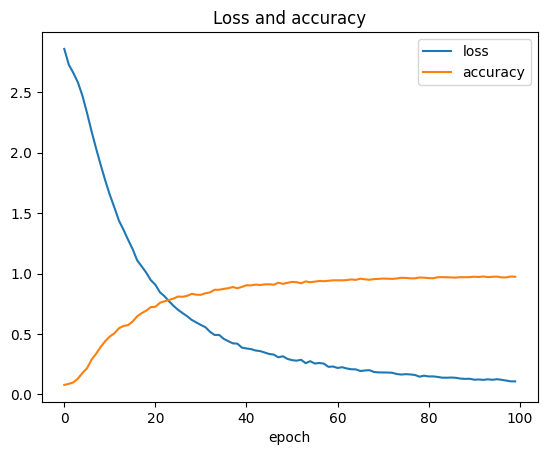

In [111]:
plt.plot(output.history['loss'])
plt.plot(output.history['accuracy'])
plt.xlabel('epoch')
plt.legend(['loss', 'accuracy'], loc='upper right')
plt.title('Loss and accuracy')
plt.show()